In [1]:
import keras
keras.__version__

'2.4.3'

# RNNs (F. Chollet)

## Vanilla RNN

In [2]:
from keras.layers import SimpleRNN

`SimpleRNN` processes batches of sequences, this means that it takes inputs of shape `(batch_size, timesteps, input_features)`.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each 
input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor argument. Let's take a look at an example:

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [29]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, you have to get all intermediate layers to return full sequences:

In [30]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [4]:
import numpy as np
# guardar el np.load actual
#np_load_old = np.load

# modificar los parametros... 
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


/home/victor/virtual_env/deep/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/victor/virtual_env/deep/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
(tr, y_tr), (te, y_te) = imdb.load_data(num_words=max_features)

In [34]:
type(tr)

numpy.ndarray

In [10]:
# vuelvo a restaurar el np.load
#np.load = np_load_old

Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 90ms/step - loss: 0.5739 - acc: 0.6933 - val_loss: 0.4546 - val_acc: 0.7856
Epoch 2/10
157/157 [==============================] - 14s 88ms/step - loss: 0.3406 - acc: 0.8580 - val_loss: 0.3546 - val_acc: 0.8556
Epoch 3/10
157/157 [==============================] - 14s 86ms/step - loss: 0.2556 - acc: 0.9013 - val_loss: 0.3611 - val_acc: 0.8604
Epoch 4/10
157/157 [==============================] - 14s 88ms/step - loss: 0.2028 - acc: 0.9250 - val_loss: 0.3901 - val_acc: 0.8524
Epoch 5/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1272 - acc: 0.9538 - val_loss: 0.4610 - val_acc: 0.8226
Epoch 6/10
157/157 [==============================] - 14s 87ms/step - loss: 0.0795 - acc: 0.9723 - val_loss: 0.5930 - val_acc: 0.8312
Epoch 7/10
157/157 [==============================] - 13s 84ms/step - loss: 0.0530 - acc: 0.9829 - val_loss: 0.5597 - val_acc: 0.8438
Epoch 8/10
157/157 [==============================] - 13s 84ms

Let's display the training and validation loss and accuracy:

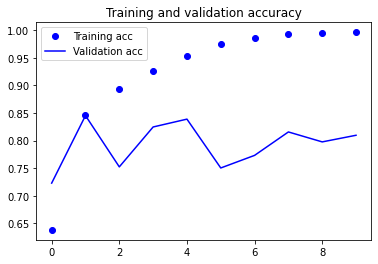

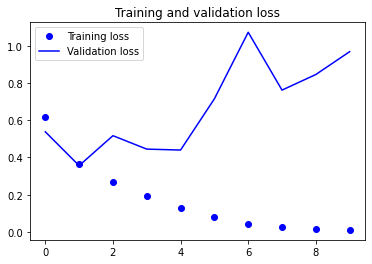

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

In [14]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 153ms/step - loss: 0.5196 - acc: 0.7514 - val_loss: 0.3474 - val_acc: 0.8540
Epoch 2/10
157/157 [==============================] - 22s 143ms/step - loss: 0.2915 - acc: 0.8835 - val_loss: 0.3317 - val_acc: 0.8616
Epoch 3/10
157/157 [==============================] - 22s 140ms/step - loss: 0.2266 - acc: 0.9140 - val_loss: 0.2984 - val_acc: 0.8800
Epoch 4/10
157/157 [==============================] - 22s 141ms/step - loss: 0.1965 - acc: 0.9254 - val_loss: 0.2976 - val_acc: 0.8824
Epoch 5/10
157/157 [==============================] - 22s 142ms/step - loss: 0.1737 - acc: 0.9333 - val_loss: 0.3348 - val_acc: 0.8880
Epoch 6/10
157/157 [==============================] - 23s 143ms/step - loss: 0.1519 - acc: 0.9435 - val_loss: 0.4319 - val_acc: 0.8318
Epoch 7/10
157/157 [==============================] - 22s 142ms/step - loss: 0.1391 - acc: 0.9505 - val_loss: 0.3283 - val_acc: 0.8846
Epoch 8/10
157/157 [==============================] - 2

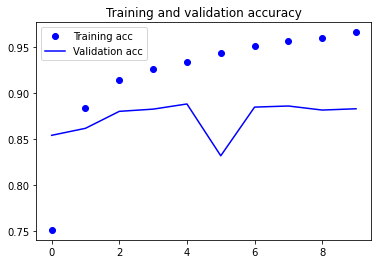

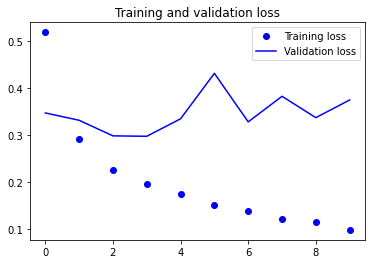

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Stack de LSTM

In [39]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 25)                825       
_________________________________________________________________
dense_8 (Dense)              (None, 1)               

In [40]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 97s 619ms/step - loss: 0.4914 - acc: 0.7576 - val_loss: 0.3249 - val_acc: 0.8624
Epoch 2/10
157/157 [==============================] - 93s 590ms/step - loss: 0.3011 - acc: 0.8813 - val_loss: 0.4361 - val_acc: 0.8588
Epoch 3/10
157/157 [==============================] - 95s 603ms/step - loss: 0.2428 - acc: 0.9075 - val_loss: 0.6526 - val_acc: 0.7456
Epoch 4/10
157/157 [==============================] - 96s 613ms/step - loss: 0.2112 - acc: 0.9225 - val_loss: 0.3044 - val_acc: 0.8806
Epoch 5/10
157/157 [==============================] - 97s 620ms/step - loss: 0.1839 - acc: 0.9342 - val_loss: 0.2998 - val_acc: 0.8816
Epoch 6/10
157/157 [==============================] - 99s 631ms/step - loss: 0.1589 - acc: 0.9414 - val_loss: 0.3183 - val_acc: 0.8748
Epoch 7/10
157/157 [==============================] - 99s 631ms/step - loss: 0.1440 - acc: 0.9498 - val_loss: 0.4010 - val_acc: 0.8788
Epoch 8/10
157/157 [==============================] - 9

## RNN bidireccional

Usaremos LSTM para éste ejemplo, pero puedes agregar otro tipo de RNN

In [10]:
from keras.layers import LSTM
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(max_features, 32))
#model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
          
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 338,291
Trainable params: 338,291
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 38s 245ms/step - loss: 0.4950 - acc: 0.7571 - val_loss: 0.3235 - val_acc: 0.8676
Epoch 2/10
157/157 [==============================] - 38s 244ms/step - loss: 0.2826 - acc: 0.8869 - val_loss: 0.2943 - val_acc: 0.8768
Epoch 3/10
157/157 [==============================] - 39s 250ms/step - loss: 0.2242 - acc: 0.9137 - val_loss: 0.3579 - val_acc: 0.8568
Epoch 4/10
157/157 [==============================] - 41s 262ms/step - loss: 0.1928 - acc: 0.9279 - val_loss: 0.3285 - val_acc: 0.8744
Epoch 5/10
157/157 [==============================] - 39s 249ms/step - loss: 0.1726 - acc: 0.9383 - val_loss: 0.4477 - val_acc: 0.8626
Epoch 6/10
157/157 [==============================] - 37s 238ms/step - loss: 0.1537 - acc: 0.9446 - val_loss: 0.5741 - val_acc: 0.8284
Epoch 7/10
157/157 [==============================] - 37s 236ms/step - loss: 0.1383 - acc: 0.9497 - val_loss: 0.3259 - val_acc: 0.8890
Epoch 8/10
157/157 [==============================] - 3

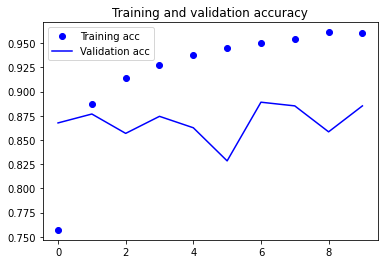

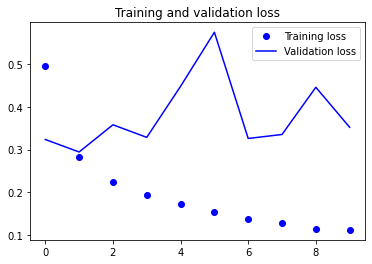

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

También puedes usar la definición forward-backward layer, que creo, es más clara

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
forward_layer = LSTM(32, return_sequences=True)
backward_layer = LSTM(32, return_sequences=True, go_backwards=True)
model.add(Bidirectional(forward_layer, backward_layer=backward_layer))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()